# HKL Model with Constant Interaction

## $d=1$

### Imports

In [3]:
from HKLnumerics import HKLconstant_1D, PlotFunctions
import numpy as np

### Single Plot

In [ ]:
U_1d_single = 8
f0_1d_single = 10

mu_1d_single = HKLconstant_1D.create_mu_array(500, U_1d_single, f0_1d_single)

rho_1d_single = HKLconstant_1D.create_rho_array(mu_1d_single, U_1d_single, f0_1d_single)


Progress: 99.8%                    

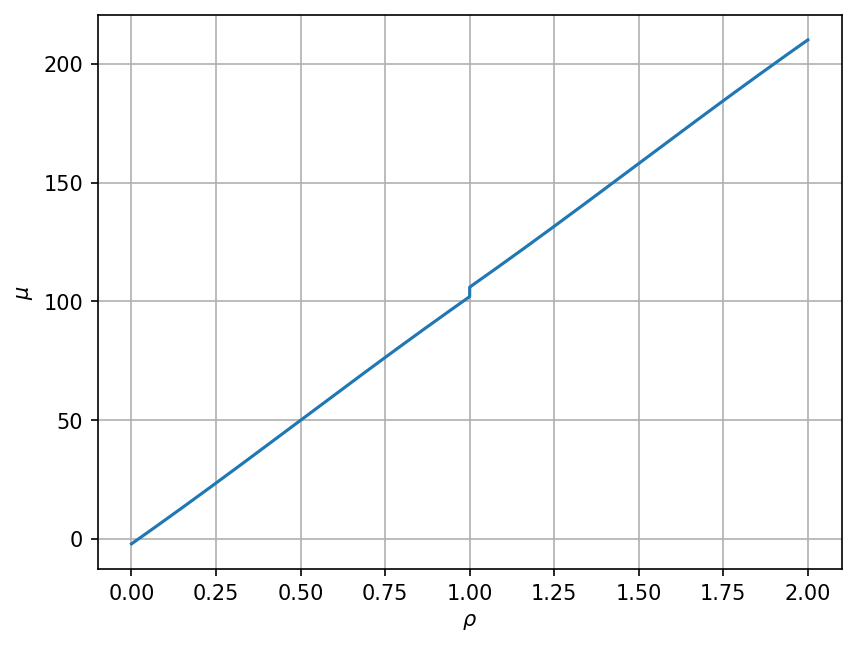

In [16]:
PlotFunctions.one_plot(rho_1d_single, mu_1d_single, r'$\rho$', r'$\mu$')

### $U=const.$, see how $f_0$ affects plot

In [4]:
U_1d_f0s = 8
f0s_1d = [0, 2, 4, 6]
N = 5000


str_f_0 = r'$f_0 / t$'
f0_1d_labels = []
rhos_1d_f0s = []
mus_1d_f0s_list = []

for f0_val in f0s_1d:
    mu_arr = HKLconstant_1D.create_mu_array(N, U_1d_f0s, f0_val)
    rho_arr = HKLconstant_1D.create_rho_array(mu_arr, U_1d_f0s, f0_val)

    f0_1d_labels.append(f'{str_f_0} = {f0_val}')
    mus_1d_f0s_list.append(mu_arr)
    rhos_1d_f0s.append(rho_arr)

Progress: 100.0%                    

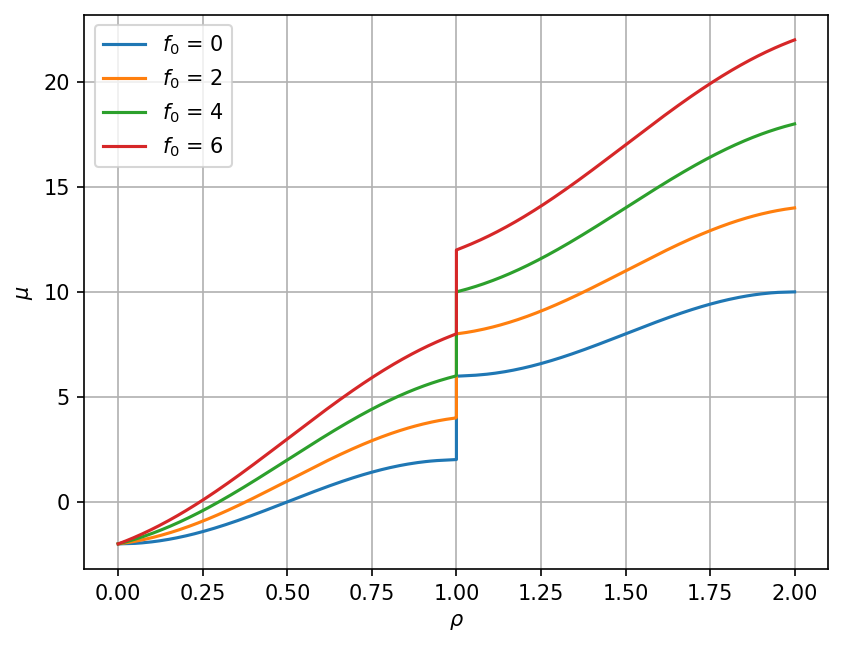

In [4]:
PlotFunctions.many_plots(f0_1d_labels, rhos_1d_f0s, mus_1d_f0s_list, r'$\rho$', r'$\mu$')

In [5]:
U_1d_f0s_weak = 2
N = 5000

rhos_1d_f0s_weak = []
mus_1d_f0s_list_weak = []

for f0_val in f0s_1d:
    mu_arr = HKLconstant_1D.create_mu_array(N, U_1d_f0s_weak, f0_val)
    rho_arr = HKLconstant_1D.create_rho_array(mu_arr, U_1d_f0s_weak, f0_val)

    mus_1d_f0s_list_weak.append(mu_arr)
    rhos_1d_f0s_weak.append(rho_arr)

Progress: 100.0%                    

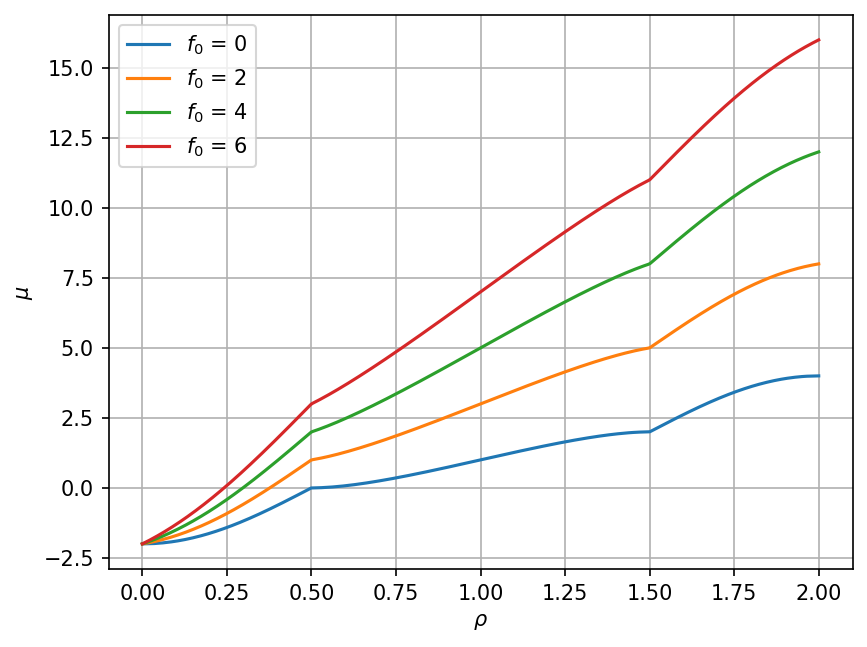

In [8]:
PlotFunctions.many_plots(f0_1d_labels, rhos_1d_f0s_weak, mus_1d_f0s_list_weak, r'$\rho$', r'$\mu$')

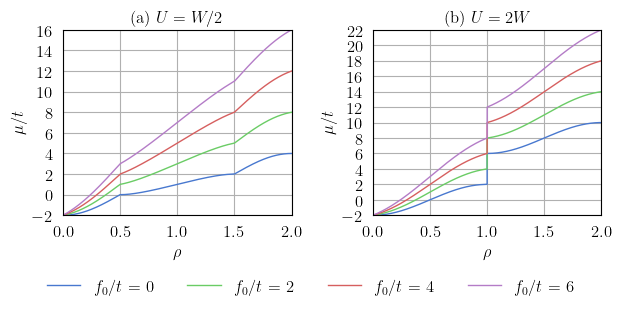

In [9]:
import matplotlib.pyplot as plt
import importlib
importlib.reload(PlotFunctions)

plt.style.use('seaborn-v0_8-muted')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    "font.size": 12,
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

PlotFunctions.thesis_doubleplot_multiple_lines([f0_1d_labels, f0_1d_labels], [rhos_1d_f0s_weak, rhos_1d_f0s], [mus_1d_f0s_list_weak, mus_1d_f0s_list],
                                               r'$\rho$', [r'$\mu / t$', r'$\mu / t$'], [r'(a) $U=W/2$', r'(b) $U=2W$'], yticks=[2, 2],
                                                 reverse=False, save_title='Plots/HKLconstant_mu_1d_many_f0.pdf')

### $f_1 = const.$, see affect of different $U$

In [17]:
f_0 = 0
N = 500

U_vals = [1, 2, 3, 4]

f_0_str = r'$f_0$'
rhos_U = []
mus_U = []
labels_U = []

for U_val in U_vals:
    mu_U_val = HKLconstant_1D.create_mu_array(N, U_val, f_0)
    rho_U_val =HKLconstant_1D.create_rho_array(mu_U_val, U_val, f_0)

    labels_U.append(f'U = {U_val}')
    rhos_U.append(rho_U_val)
    mus_U.append(mu_U_val)

Progress: 99.8%                    

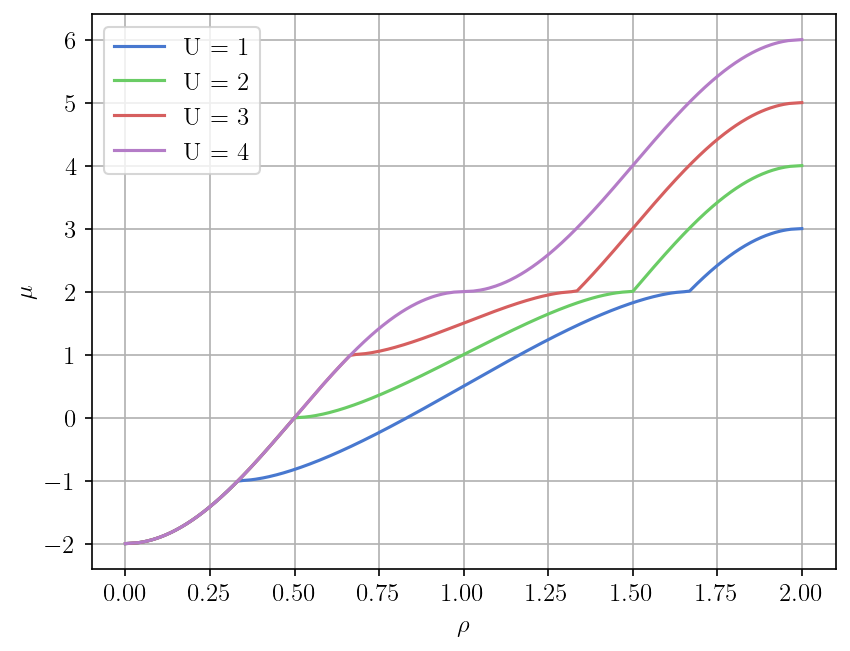

In [18]:
PlotFunctions.many_plots(labels_U, rhos_U, mus_U, r'$\rho$', r'$\mu$')

### Compressibility

In [6]:
import importlib
importlib.reload(HKLconstant_1D)

kappas_1d_weak = []
kappas_1d_strong = []

for i in range(4):
    kappas_1d_weak.append(HKLconstant_1D.create_kappa_array(mus_1d_f0s_list_weak[i], rhos_1d_f0s_weak[i], U_1d_f0s_weak, f0s_1d[i]))
    kappas_1d_strong.append(HKLconstant_1D.create_kappa_array(mus_1d_f0s_list[i], rhos_1d_f0s[i], U_1d_f0s, f0s_1d[i]))

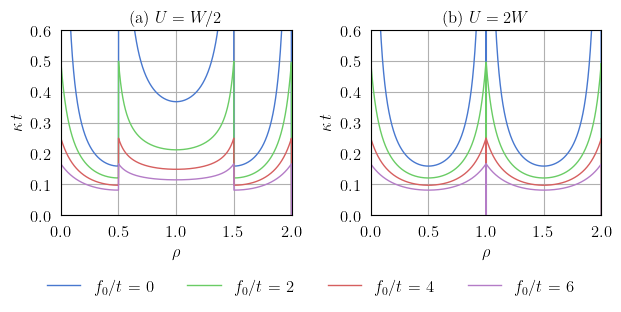

In [10]:
importlib.reload(PlotFunctions)

PlotFunctions.thesis_doubleplot_multiple_lines([f0_1d_labels, f0_1d_labels], [rhos_1d_f0s_weak, rhos_1d_f0s], [kappas_1d_weak, kappas_1d_strong],
                                               r'$\rho$', [r'$\kappa \, t$', r'$\kappa \, t$'], [r'(a) $U=W/2$', r'(b) $U=2W$'], yticks=[0.1, 0.1], ymax=[0.6, 0.6],
                                               reverse=False, save_title='Plots/HKLconstant_kappa_1d.pdf')

### Energy Density

#### Single Plot

Progress: 99.8%                    

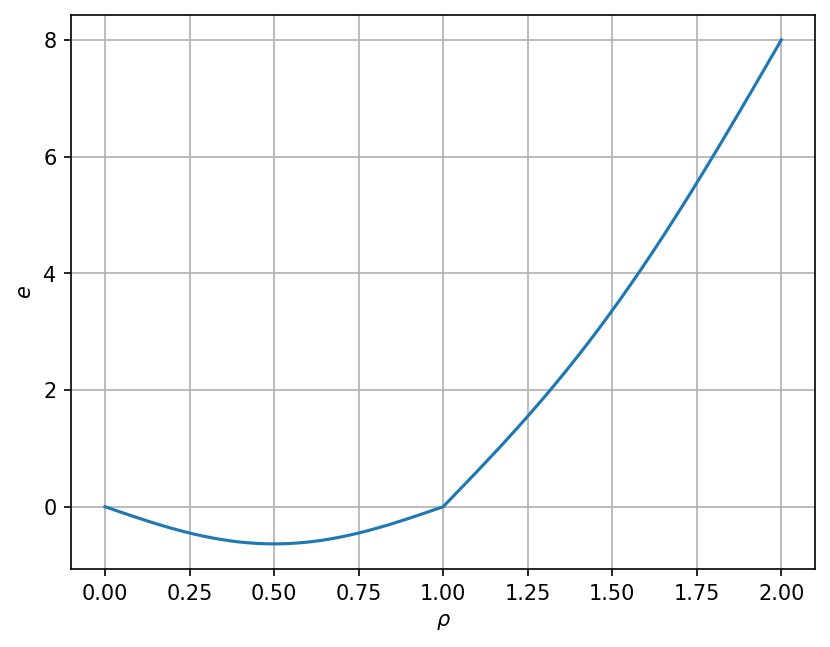

In [15]:
e_1d_single = HKLconstant_1D.create_energy_array(mu_1d_single, rho_1d_single, U_1d_single, f0_1d_single)

PlotFunctions.one_plot(rho_1d_single, e_1d_single, r'$\rho$', r'$e$')

### multiple plots

In [6]:
energies_weak = [HKLconstant_1D.create_energy_array(mus_1d_f0s_list_weak[i], rhos_1d_f0s_weak[i], U_1d_f0s_weak, f0s_1d[i]) for i in range(len(f0s_1d))]
energies_strong = [HKLconstant_1D.create_energy_array(mus_1d_f0s_list[i], rhos_1d_f0s[i], U_1d_f0s, f0s_1d[i]) for i in range(len(f0s_1d))]

Progress: 100.0%                    

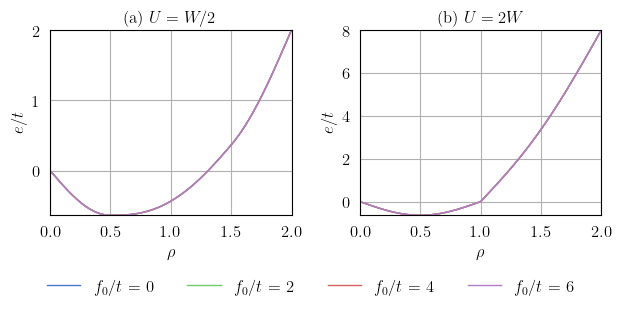

In [11]:
import importlib
import matplotlib.pyplot as plt

importlib.reload(PlotFunctions)
plt.style.use('seaborn-v0_8-muted')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    "font.size": 12,
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

PlotFunctions.thesis_doubleplot_multiple_lines([f0_1d_labels, f0_1d_labels], [rhos_1d_f0s_weak, rhos_1d_f0s], [energies_weak, energies_strong],
                                               r'$\rho$', [r'$e / t$', r'$e / t$'], [r'(a) $U=W/2$', r'(b) $U=2W$'], yticks=[1, 2],
                                                 reverse=False)

## $d=2$

## $d=3$